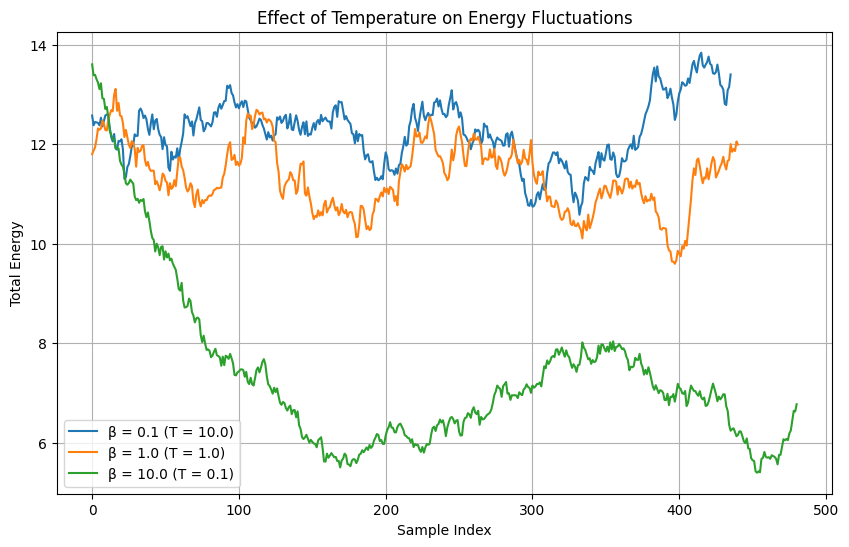

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
N = 50                  # Number of particles
steps = 5000            # Total Monte Carlo steps
L = 1.0                 # Box length (1x1x1 cube)
delta = 0.1             # Max displacement per move
k = 1.0                 # Spring constant

# Define different inverse temperatures (β = 1 / k_B T)
beta_values = [0.1, 1.0, 10.0]  # High T, medium T, low T

# Store energy logs for each β
energy_logs = {}

for beta in beta_values:
    positions = np.random.uniform(0, L, size=(N, 3))  # Reinitialize
    energy = lambda x: np.sum((x - 0.5)**2)
    energy_log = []

    for step in range(steps):
        i = np.random.randint(0, N)
        old_pos = positions[i].copy()
        new_pos = old_pos + np.random.uniform(-delta, delta, size=3)

        if np.any(new_pos < 0) or np.any(new_pos > L):
            continue

        U_old = energy(old_pos)
        U_new = energy(new_pos)
        delta_U = U_new - U_old

        if delta_U < 0 or np.random.rand() < np.exp(-beta * delta_U):
            positions[i] = new_pos

        if step % 10 == 0:
            total_energy = np.sum([energy(p) for p in positions])
            energy_log.append(total_energy)

    energy_logs[beta] = energy_log

# --- Plotting Energy vs. Time for Different β Values ---
plt.figure(figsize=(10, 6))
for beta, log in energy_logs.items():
    plt.plot(log, label=f"β = {beta} (T = {1/beta:.1f})")
plt.xlabel("Sample Index")
plt.ylabel("Total Energy")
plt.title("Effect of Temperature on Energy Fluctuations")
plt.legend()
plt.grid(True)
plt.show()


Interpretation

High Temperature (T = 10, β = 0.1)
The system is more energetic.
Moves that increase energy are accepted often.
Particles explore high-energy, wide areas → more thermal “chaos.”
Result: Higher average energy, large fluctuations.

Medium Temperature (T = 1, β = 1)
Balance between energy-lowering and randomness.
Some exploration, but not too wild.
Result: Moderate energy, moderate fluctuations.

Low Temperature (T = 0.1, β = 10)
System strongly prefers lower-energy configurations.
Rarely accepts energy-increasing moves.
Particles "settle" near the center more quickly and stay there.
Result: Lower average energy, tight fluctuations.

Key Physical Insight

This exactly mirrors how real physical systems behave:

High temp = gas particles flying everywhere
Low temp = atoms huddled together in a crystal